In [1]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch

model = load_model('models/6partGHZ.pt', 'cpu', 60, 1, 3)
DIM = [2] * 6
kets = hf.makeState('000000+111111')
state = fc.State(kets, normalize=True)

In [2]:
input_graph, ket_amplitudes, output_fidelity = generatorGraphFidelity(DIM, state, short_output=False)

In [3]:
#baseline graph
for edge in input_graph.edges:
    input_graph[edge] = 0
    if edge in [(0, 1, 0, 0), (2, 3, 0, 0), (4, 5, 0, 0), (1, 2, 1, 1), (3, 4, 1, 1), (0, 5, 1, 1)]:
        input_graph[edge] = 1
input_graph.getState()
input_graph.state.normalize()
#predict fidelity of baseline (which ideally should be 1)
input = torch.tensor(input_graph.weights, dtype=torch.float).to('cpu')
model(input)

tensor([0.2061], grad_fn=<AddBackward0>)

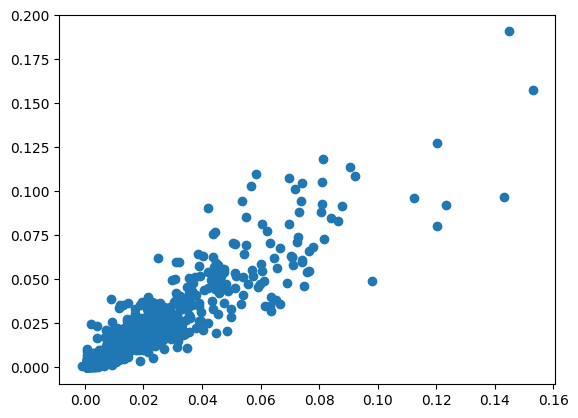

In [4]:
#scatterplot ground-truth vs. prediction
x = []
y = []
for i in range(1000):
    input_graph, ket_amplitudes, output_fidelity = generatorGraphFidelity(DIM, state, short_output=False)
    input = torch.tensor(input_graph.weights, dtype=torch.float).to('cpu')
    x.append(float(model(input)))
    y.append(output_fidelity)
plt.scatter(x, y)

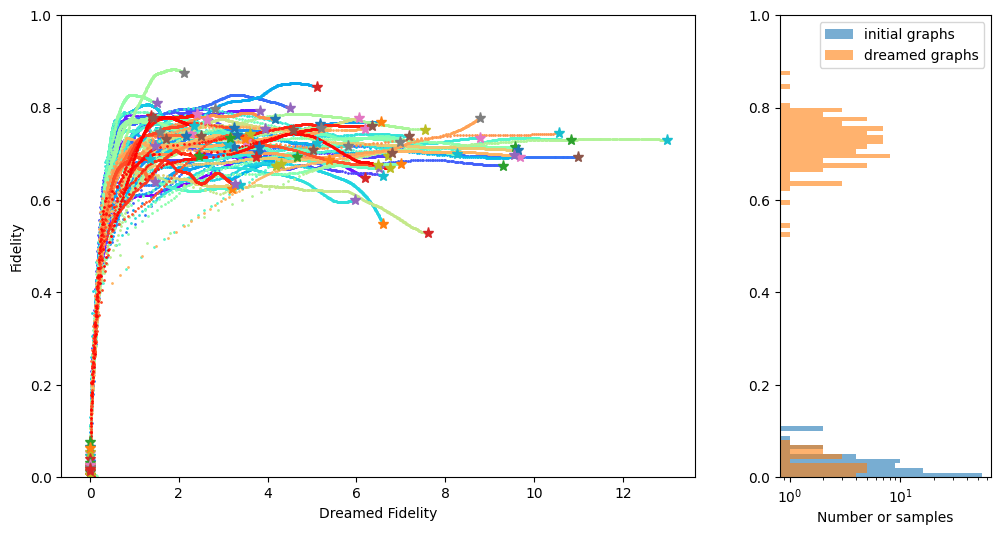

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

directory = 'dreamfiles/dream6qfid'
colors = cm.rainbow(np.linspace(0, 1, 100))
data = []
for filename in os.listdir(directory):
    df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), filename])

#data = sorted(data, key=lambda x: x[0][0])
init = []
final = []
for ii, sample in enumerate(data):
    init.append(sample[0][0])
    final.append(sample[0][-1])

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(12, 6))
#plt.subplot(211)
for ii, sample in enumerate(data):
    c = colors[ii]
    a0.scatter(sample[1], sample[0], color=c, s=1)
    a0.plot([sample[1][-1]], [sample[0][-1]], marker='*', markersize=8)

a0.set_ylim([0, 1])
a0.set_xlabel('Dreamed Fidelity')
a0.set_ylabel('Fidelity')

#plt.subplot(212)
bins = np.arange(0, 1, 0.01)  # fixed bin size
a1.set_ylim([0, 1])
a1.set_xscale('log')
a1.set_xlabel('Number or samples')
a1.hist(init, bins=bins, alpha=0.6, orientation="horizontal",label='initial graphs')
a1.hist(final, bins=bins, alpha=0.6, orientation="horizontal",label='dreamed graphs')
a1.legend(prop={'size': 10})

fidelity                                               0.712103
activation                                             0.706616
graph         [-0.05812722444534302, -0.10108081251382828, 0...
Name: 57, dtype: object


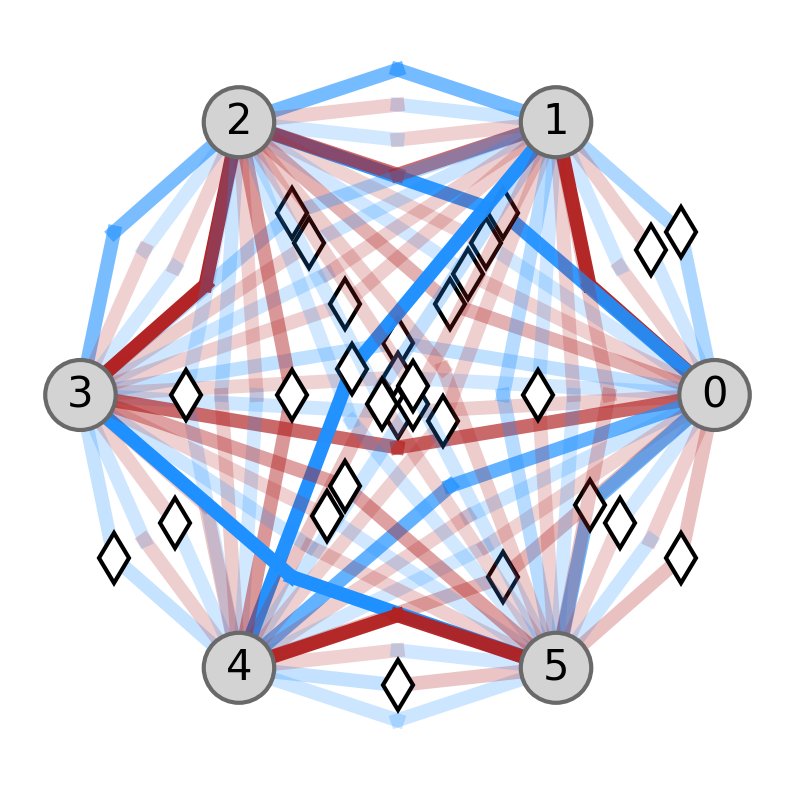

0.7665454044045316


In [6]:
fids = [data[ii][0][-1] for ii in range(len(data))]
ind = np.argmax(fids)
filename = data[ind][2]
df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
weights = eval(df.iloc[-1, 2])
edges = th.buildAllEdges(dimensions=6 * [2])
print(df.iloc[ind])
graph = fc.Graph(edges=edges, weights=weights)

newweights = [w / max(graph.weights) for w in graph.weights]
newgraph = fc.Graph(edges=graph.edges, weights=newweights)
newgraph.purge(threshold=0, update=True)
newgraph = fc.Graph(newgraph.edges, weights=newgraph.weights)
gp.graphPlot(newgraph)
newgraph.getState()
dreamstate = newgraph.state
dreamstate.normalize()
print((state @ newgraph.state) ** 2)

60


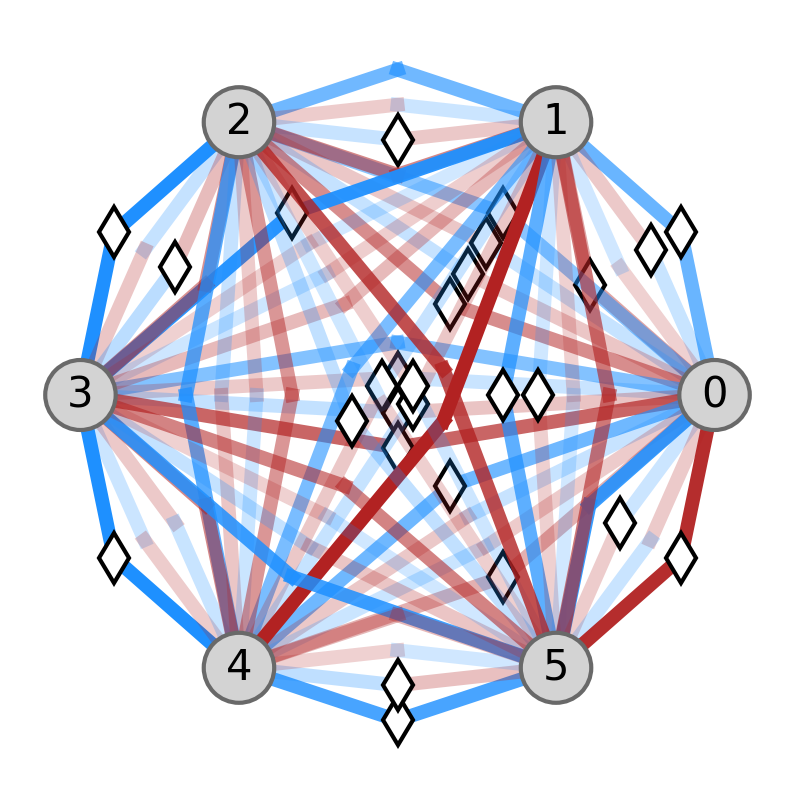

0.5316076456821918


In [50]:
preds = [data[ii][1][-1] for ii in range(len(data))]
ind = np.argmax(preds)
filename = data[ind][2]
df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
weights = eval(df.iloc[-1, 2])
edges = th.buildAllEdges(dimensions=6 * [2])
print(len(edges))
graph = fc.Graph(edges=edges, weights=weights)

newweights = [w / max(graph.weights) for w in graph.weights]
newgraph = fc.Graph(edges=graph.edges, weights=newweights)
newgraph.purge(threshold=0, update=True)
newgraph = fc.Graph(newgraph.edges, weights=newgraph.weights)
gp.graphPlot(newgraph)
newgraph.getState()
dreamstate = newgraph.state
dreamstate.normalize()
print((state @ newgraph.state) ** 2)